# Ensemble methods

**Michał Spinczyk**

## Single Classifier vs Bagging vs Boosting

### Importing necessary libraries and dataset

In [32]:
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

wine_data = load_wine()

### Creating models and printing scores

In [33]:
clf_1 = DecisionTreeClassifier(random_state=1, min_samples_leaf = 3)
clf_1_1 = DecisionTreeClassifier(random_state=1, min_samples_leaf = 3,max_depth = 1)
clf_2 = BaggingClassifier(base_estimator = clf_1, n_estimators = 50, random_state=1)
clf_3 = AdaBoostClassifier(base_estimator = clf_1_1, n_estimators=50, random_state=1, algorithm = 'SAMME')
clf_4 = GradientBoostingClassifier(n_estimators=50, subsample = 0.5, learning_rate=1.0, max_depth=1, random_state=1)

decision_tree = cross_val_score(clf_1, wine_data.data, wine_data.target, cv=5)
bagging = cross_val_score(clf_2, wine_data.data, wine_data.target, cv=5)
ada_boost = cross_val_score(clf_3, wine_data.data, wine_data.target, cv=5)
gradient_boosting = cross_val_score(clf_4, wine_data.data, wine_data.target, cv=5)

print("Decision tree scores: {}, (avg: {})".format(decision_tree, np.average(decision_tree)))
print("Bagging scores: {}, (avg: {})".format(bagging, np.average(bagging)))
print("AdaBoost scores: {}, (avg: {})".format(ada_boost, np.average(ada_boost)))
print("Gradient boosting scores: {}, (avg: {})".format(gradient_boosting, np.average(gradient_boosting)))

Decision tree scores: [0.94444444 0.80555556 0.80555556 0.91428571 0.97142857], (avg: 0.8882539682539681)
Bagging scores: [0.91666667 0.91666667 0.94444444 0.97142857 1.        ], (avg: 0.9498412698412698)
AdaBoost scores: [0.83333333 0.91666667 0.91666667 1.         1.        ], (avg: 0.9333333333333332)
Gradient boosting scores: [0.88888889 0.91666667 0.97222222 0.97142857 1.        ], (avg: 0.9498412698412698)


### Determining an approximated number of iterations after which the Gradient Boosting model yields almost no further improvement

In [34]:
clf = GradientBoostingClassifier(n_estimators=50, subsample = 0.5, learning_rate=1.0, max_depth=1, random_state=1)

clf.fit(wine_data.data, wine_data.target)

oob = np.cumsum(clf.oob_improvement_)

print(oob)
print(len(oob))

iterations = np.linspace(1,50,50)
print(iterations)

[0.70480913 0.78898321 0.82350824 0.85190548 0.86147413 0.84892542
 0.84854777 0.85094981 0.85371896 0.85811652 0.85710108 0.85697538
 0.85614239 0.85352186 0.85254926 0.85304529 0.85381251 0.85365468
 0.85300144 0.85290745 0.8533147  0.8525165  0.85241097 0.85239872
 0.85236902 0.85222116 0.85195162 0.85244364 0.85243927 0.85240267
 0.8523588  0.85235417 0.85232354 0.85231731 0.85227048 0.85226114
 0.8522629  0.85225759 0.85225186 0.85226509 0.85225037 0.85222533
 0.85222254 0.85221793 0.8522077  0.85221045 0.85221504 0.85221276
 0.85220837 0.85219632]
50
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50.]


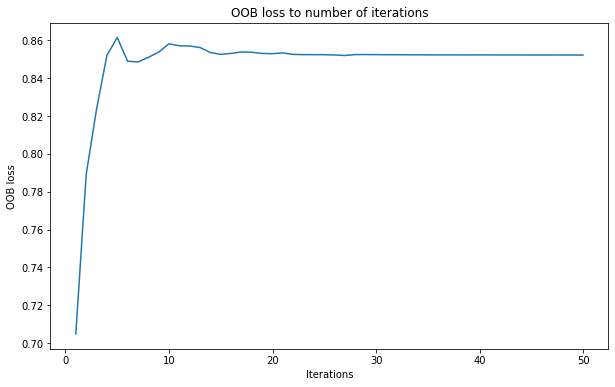

In [35]:
plt.figure(figsize = (10,6))
plt.plot(iterations, oob)
plt.xlabel("Iterations")
plt.ylabel("OOB loss")
plt.title("OOB loss to number of iterations")
plt.show()

As can be seen Gradient Boosting model yields almost no further improvement after 5 iterations.